In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import sys
sys.path.insert(0, '/content/drive/MyDrive/Telecommunication-Industry-Analysis')


In [ ]:
import clean_dataframe as cleanData

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
all_data = pd.read_excel("/content/drive/MyDrive/Telecommunication-Industry-Analysis/teleco_excel_file.xlsx")

# all_data.head()
# pd.set_option('display.max_columns', 50)

In [ ]:
# all_data.columns.tolist()

In [ ]:
print(f" There are {all_data.shape[0]} rows and {all_data.shape[1]} columns")

##### Dealing with missing values

In [ ]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The telco dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(all_data)

The telco dataset contains 12.5 % missing values.


In [ ]:
all_data.isna().sum()

#### showing the missing columns

In [ ]:
# Now which column(s) has missing values
# all_data.isna().sum()

In [ ]:
fd = pd.DataFrame(all_data)


In [ ]:
# cleanData(fd)

In [ ]:
df = fd.drop(['IMSI', 'IMEI','TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)','Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B'], axis=1)

In [ ]:
df.iloc[:5 , 0:10]

In [50]:
df["Bearer Id"] = df["Bearer Id"].fillna(df["Bearer Id"].mode()[0])
df["Start"] = df["Start"].fillna(method='ffill')
df["Start ms"] = df["Start ms"].fillna(method='ffill')
df["End"] = df["End"].fillna(method='ffill')
df["End ms"] = df["End ms"].fillna(method='ffill')
df["Dur. (ms)"] = df["Dur. (ms)"].fillna(method='ffill')
df["Total UL (Bytes)"] = df["Total UL (Bytes)"].fillna(df["Total UL (Bytes)"].mode()[0])
df["Total DL (Bytes)"] = df["Total UL (Bytes)"].fillna(df["Total DL (Bytes)"].mode()[0])
df["Nb of sec with Vol DL < 6250B"] = df["Nb of sec with Vol DL < 6250B"].fillna(df["Nb of sec with Vol DL < 6250B"].mode()[0]) 
df["Nb of sec with Vol UL < 1250B"] = df["Nb of sec with Vol UL < 1250B"].fillna(df["Nb of sec with Vol UL < 1250B"].mode()[0])
df["MSISDN/Number"] = df["MSISDN/Number"].fillna(df["MSISDN/Number"].mode()[0])
df["Avg RTT DL (ms)"] = df["Avg RTT DL (ms)"].fillna(df["Avg RTT DL (ms)"].mode()[0])
df["Avg RTT UL (ms)"] = df["Avg RTT UL (ms)"].fillna(df["Avg RTT UL (ms)"].mode()[0])
df["Avg Bearer TP DL (kbps)"] = df["Avg Bearer TP DL (kbps)"].fillna(df["Avg Bearer TP DL (kbps)"].mode()[0])
df["Avg Bearer TP UL (kbps)"] = df["Avg Bearer TP UL (kbps)"].fillna(df["Avg Bearer TP UL (kbps)"].mode()[0])
df["Activity Duration DL (ms)"] = df["Activity Duration DL (ms)"].fillna(df["Activity Duration DL (ms)"].mode()[0])
df["Activity Duration UL (ms)"] = df["Activity Duration UL (ms)"].fillna(df["Activity Duration UL (ms)"].mode()[0])
df["Dur. (ms).1"] = df["Dur. (ms).1"].fillna(df["Dur. (ms).1"].mode()[0])
df["Handset Manufacturer"] = df["Handset Manufacturer"].fillna(value='undefined')
df["Handset Type"] = df["Handset Type"].fillna(value='undefined')
df["Last Location Name"] = df["Last Location Name"].fillna(value='undefined')
df = df.fillna(value=0)

In [ ]:
# df.isna().sum()

In [ ]:
# df["Nb of sec with Vol DL < 6250B"].isna().sum()

In [ ]:
df['Bearer Id'].describe()

count    1.500010e+05
mean     1.015806e+19
std      2.893178e+18
min      6.917538e+18
25%      7.349883e+18
50%      7.349883e+18
75%      1.304243e+19
max      1.318654e+19
Name: Bearer Id, dtype: float64

## Data Scaling 

### Standardization

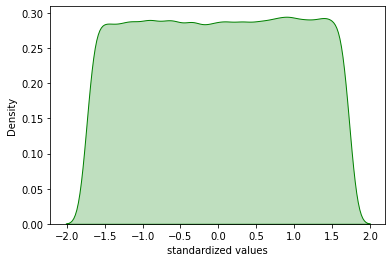

In [ ]:
#define the columns 
 
cols = ['Bearer Id', 'Dur. (ms)', 'MSISDN/Number','Social Media DL (Bytes)','Social Media UL (Bytes)',
        'Google DL (Bytes)','Google UL (Bytes)' , 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
        'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Total UL (Bytes)' , 'Total DL (Bytes)']
 
#call the standard scaler 
std_scaler = StandardScaler()
 
#fit the values to the function 
Stand_Sc = std_scaler.fit_transform(df[cols].iloc[:,range(0,7)].values)
 
#use seaborn for KDE plot
sns.kdeplot(Stand_Sc[:,5],fill=True, color = 'Green')
 
#Label the plot 
plt.xlabel('standardized values')
 
#Print the plot 
plt.show()

### Normalization

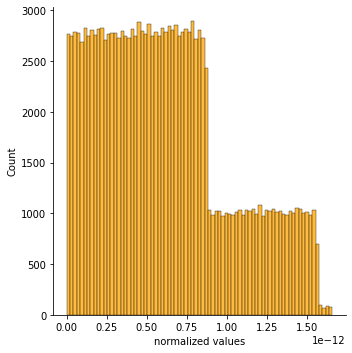

In [ ]:
#initialize normalizer
data_norm = Normalizer()
 
#Fit the data
Normalize = data_norm.fit_transform(df[cols].iloc[:,range(0,7)].values)
 
#Distribution plot 
sns.displot(Normalize[:,5],fill=True, color = 'orange')
 
#Add the axis labels 
plt.xlabel('normalized values')
 
#Display the plot 
plt.show()

In [ ]:
# df[cols]["Bearer Id"]

## Extracting Data

### Handset type and manufacures

In [ ]:
ht = df["Handset Type"].value_counts()
ht.head(10)

In [ ]:
hm = df["Handset Manufacturer"].value_counts()
hm.head(3)

In [ ]:
Manu_grp = df.groupby(["Handset Manufacturer"])
Manu_grp.get_group('Apple').iloc[:1 , 20:40]

In [ ]:
Manu_grp['Handset Type'].value_counts().loc['Apple'].head(5)

In [ ]:
Manu_grp['Handset Type'].value_counts().loc['Samsung'].head(5)

In [ ]:
Manu_grp['Handset Type'].value_counts().loc['Huawei'].head(5)

### interpretation and recommendation to marketing teams
The data between Handset Manufacturer and Handset Type shows that most of the users from the sample data use the manufacturer Apple product


In [ ]:
df["MSISDN/Number"].value_counts()

In [ ]:
User_grp = df.groupby(["MSISDN/Number"])
# User_grp.get_group('3.362632e+10')

In [ ]:
User_grp['Bearer Id'].value_counts()

In [ ]:
User_grp['Bearer Id'].median()

In [ ]:
User_grp['Bearer Id'].mean()

In [ ]:
User_grp["MSISDN/Number"].agg(['median', 'mean'])

In [ ]:
User_grp['Dur. (ms)'].value_counts()

### number of xDR sessions and Session duration per user



In [ ]:
Userstot_grp = df.groupby(["MSISDN/Number"])

In [ ]:
Userstot_grp["Bearer Id"].value_counts().head()

MSISDN/Number  Bearer Id   
3.360100e+10   1.311448e+19    1
               7.349883e+18    1
               7.349883e+18    1
3.360101e+10   1.304243e+19    1
               7.277826e+18    1
Name: Bearer Id, dtype: int64

In [ ]:
Userstot_grp["Dur. (ms)"].value_counts().head()

MSISDN/Number  Dur. (ms)
3.360100e+10   116720.0     1
               181230.0     1
               134969.0     1
3.360101e+10   49878.0      1
               18549.0      1
Name: Dur. (ms), dtype: int64

The total data volume (in Bytes) during this session for each application

In [ ]:
Users_grp = df.groupby(["MSISDN/Number", "Social Media DL (Bytes)" , 'Google DL (Bytes)', 'Email DL (Bytes)' ,'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)'])

In [ ]:
Users_grp['Total UL (Bytes)'].value_counts().head()

MSISDN/Number  Social Media DL (Bytes)  Google DL (Bytes)  Email DL (Bytes)  Youtube DL (Bytes)  Netflix DL (Bytes)  Gaming DL (Bytes)  Other DL (Bytes)  Total UL (Bytes)
3.360100e+10   2206504.0                3337123.0          837400.0          14900201.0          10265105.0          811091133.0        377096990.0       36053108.0          1
               2598548.0                4197697.0          2828821.0         5324251.0           770569.0            105035298.0        279557701.0       36104459.0          1
               3148004.0                3343483.0          2436500.0         2137272.0           16525919.0          529068485.0        495086501.0       39306820.0          1
3.360101e+10   251469.0                 5937765.0          2178618.0         4393123.0           1157362.0           388074835.0        25248001.0        20327526.0          1
               1359904.0                6309062.0          979859.0          8027633.0           21177155.0          50924332

In [ ]:
Users_grp['Total DL (Bytes)'].value_counts().head(5)

MSISDN/Number  Social Media DL (Bytes)  Google DL (Bytes)  Email DL (Bytes)  Youtube DL (Bytes)  Netflix DL (Bytes)  Gaming DL (Bytes)  Other DL (Bytes)  Total DL (Bytes)
3.360100e+10   2206504.0                3337123.0          837400.0          14900201.0          10265105.0          811091133.0        377096990.0       36053108.0          1
               2598548.0                4197697.0          2828821.0         5324251.0           770569.0            105035298.0        279557701.0       36104459.0          1
               3148004.0                3343483.0          2436500.0         2137272.0           16525919.0          529068485.0        495086501.0       39306820.0          1
3.360101e+10   251469.0                 5937765.0          2178618.0         4393123.0           1157362.0           388074835.0        25248001.0        20327526.0          1
               1359904.0                6309062.0          979859.0          8027633.0           21177155.0          50924332

In [ ]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.500010e+05,150001.000000,150001.000000,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.015806e+19,499.189512,498.799735,1.046085e+05,4.182414e+10,94.620523,15.315031,13299.957414,1770.417111,92.378057,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112106e+07,4.112106e+07
std,2.893178e+18,288.611320,288.097034,8.103735e+04,2.438731e+12,560.245617,76.687998,23971.823147,4625.342240,14.568754,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127649e+07,1.127649e+07
min,6.917538e+18,0.000000,0.000000,7.142000e+03,3.360100e+10,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,2.866892e+06
25%,7.349883e+18,250.000000,251.000000,5.744200e+04,3.365094e+10,28.000000,3.000000,43.000000,47.000000,90.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322196e+07,3.322196e+07
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,3.366361e+10,38.000000,5.000000,63.000000,63.000000,100.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114324e+07,4.114324e+07
75%,1.304243e+19,749.000000,750.000000,1.324300e+05,3.368307e+10,62.000000,11.000000,19710.000000,1120.000000,100.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,4.903424e+07
max,1.318654e+19,999.000000,999.000000,1.859336e+06,8.823971e+14,96923.000000,7120.000000,378160.000000,58613.000000,100.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,7.833131e+07


## Data Exploration

In [ ]:
def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])    
    return df[column]

################ Plot Functions ########################
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    

def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()


def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()


def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()


def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()


def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(22, 12))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()


###Univariate Analysis

Graphical


In [ ]:
plot_hist(df, "Bearer Id", "red")

In [ ]:
df["Bearer Id"].describe()

In [ ]:
plot_hist(df, "Dur. (ms)", "yellow")

In [ ]:
df['Dur. (ms)'].describe()

In [ ]:
plot_hist(df, "Total UL (Bytes)", "blue")

In [ ]:
df["Total UL (Bytes)"].describe()

In [ ]:
plot_hist(df, "Total DL (Bytes)", "green")

In [ ]:
df["Total DL (Bytes)"].describe()

Non-Graphical

In [ ]:
plot_box(df, "Bearer Id", 'Bearer Id Outliers')

In [ ]:
plot_box(df, "Dur. (ms)", 'Dur. (ms) Outliers')

In [ ]:
plot_box(df, "Total UL (Bytes)", 'Total DL (Bytes) Outliers')

In [ ]:
plot_box(df, "Total DL (Bytes)", 'Total DL (Bytes) Outliers')

In [ ]:
df["fixed_Dur. (ms)"] = fix_outlier(df, "Dur. (ms)")

In [ ]:
plot_box(df, "fixed_Dur. (ms)", 'Dur. (ms)')

In [ ]:
df["fixed_Total DL (Bytes)"] = fix_outlier(df, "Total DL (Bytes)")

In [ ]:
plot_box(df, "fixed_Total DL (Bytes)", 'Total DL (Bytes)')

In [ ]:
df["fixed_Total UL (Bytes)"] = fix_outlier(df, "Total UL (Bytes)")

In [ ]:
plot_box(df, "fixed_Total UL (Bytes)", 'Total UL (Bytes)')

categorical variables

In [ ]:
plot_count(df, "Social Media DL (Bytes)")

In [ ]:
plot_count(df, "Google DL (Bytes)")

In [ ]:
plot_count(df, "Email DL (Bytes)")

In [ ]:
plot_count(df, "Youtube DL (Bytes)") 

In [ ]:
plot_count(df, "Netflix DL (Bytes)") 

In [ ]:
plot_count(df, "Gaming DL (Bytes)") 

In [ ]:
plot_count(df, "Other DL") 

Multivariate Analysis


This analysis is done between user location, total UL (bytes) and total DL (bytes)


Bivarate Analysis